In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f1 = 300
f2 = 350
Fs = 1500
n = 256

In [3]:
xn = []
for i in range(0, n):
  x1 = np.sin(2*np.pi*f1*i/Fs)
  x2 = np.sin(2*np.pi*f2*i/Fs)
  xn.append(x1+x2)

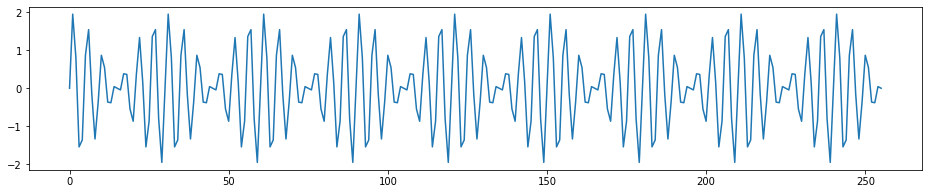

In [4]:
plt.figure(figsize=(16,3))
plt.plot(range(0, n), xn)

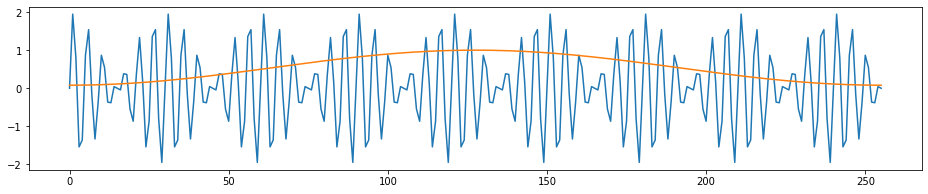

In [5]:
hamming = np.hamming(256)
plt.figure(figsize=(16,3))
plt.plot(range(0, n), xn)
plt.plot(range(0, n), hamming)

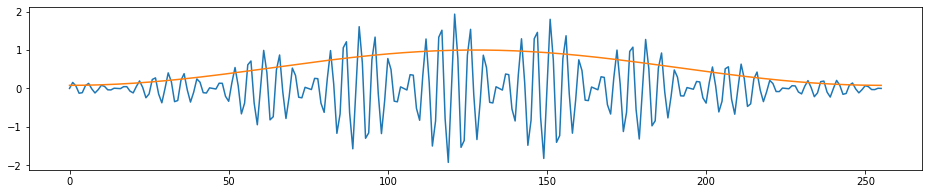

In [6]:
xhn = xn * hamming
plt.figure(figsize=(16,3))
plt.plot(range(0, n), xhn)
plt.plot(range(0, n), hamming)

In [7]:
from scipy.fft import fft

In [8]:
def findMaxABS (x):
    maxABS = 0
    for i in range(0, len(x)):
        maxABS = max(maxABS, np.abs(x[i]))
    return maxABS

In [9]:
def toDB(x, max_abs):
    DB = []
    for i in range(0, len(x)):
        DB.append(20*np.log10(np.abs(x[i])/max_abs))
    return DB

In [10]:
xn_fft = fft(xn)
xhn_fft = fft(xhn)
xn_max_abs = findMaxABS(xn_fft)
xhn_max_abs = findMaxABS(xhn_fft)
xn_db = toDB(xn_fft, xn_max_abs)
xhn_db = toDB(xhn_fft, xhn_max_abs)

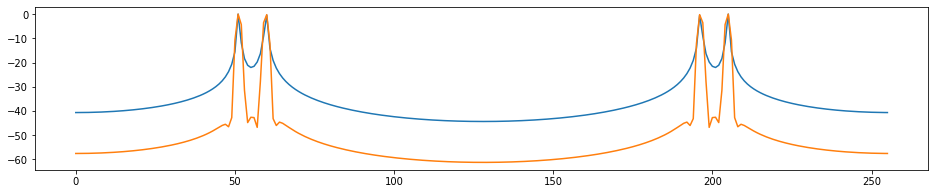

In [11]:
plt.figure(figsize=(16,3))
plt.plot(range(0,len(xn_db)),xn_db)
plt.plot(range(0,len(xhn_db)),xhn_db)